In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
sns.set_theme(style='darkgrid')

# Q1. Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


In [2]:
data=pd.read_excel('D:\ExcelR\Data science\Assignments\Clustering Assignment7\EastWestAirlines.xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#standardization
from sklearn.preprocessing import StandardScaler

In [5]:
sc=StandardScaler()

x=sc.fit_transform(data)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [6]:
x[:,0]

array([-1.73512503, -1.73426342, -1.73340181, ...,  1.72682006,
        1.72768167,  1.72854328])

In [7]:
x[:,0].mean()

0.0

In [8]:
x[:,1].mean()

2.842881663456265e-17

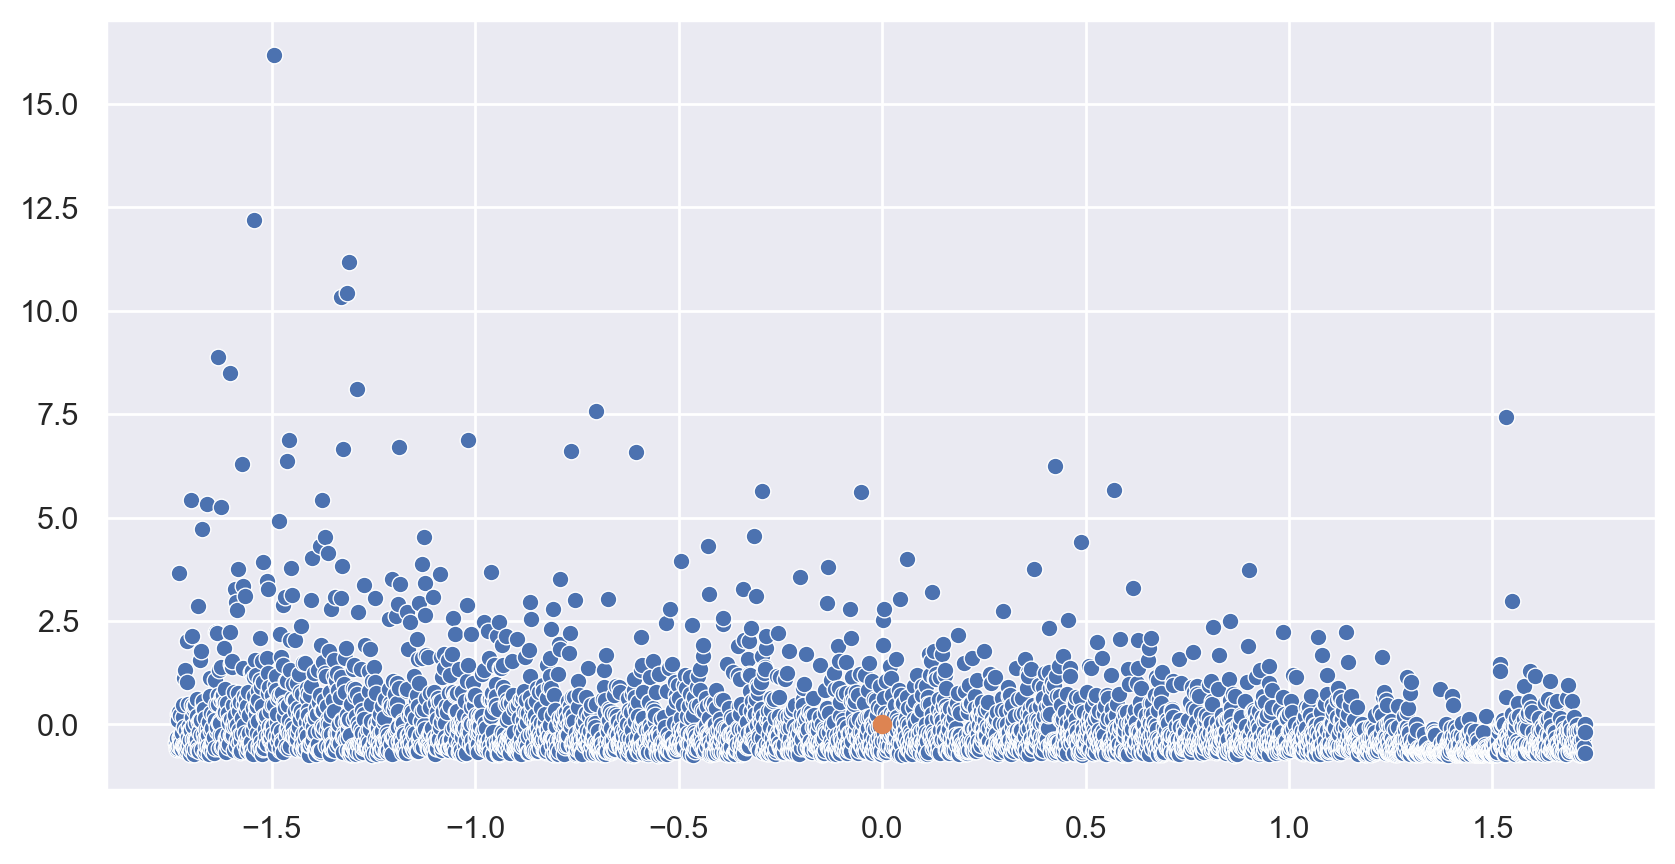

In [9]:
sns.scatterplot(x=x[:,0],y=x[:,1])
plt.scatter(x[:,0].mean(),x[:,1].mean())

### K-means clustering

In [10]:
#Model building
from sklearn.cluster import KMeans

In [11]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
km=KMeans()
yp=km.fit_predict(x)
yp

array([6, 6, 6, ..., 1, 0, 0])

In [13]:
len(yp)

3999

In [14]:
#cluster center
km.cluster_centers_

array([[ 9.67585910e-01, -3.92111839e-01, -1.36143118e-01,
        -7.18668804e-01, -9.82418871e-02, -6.27665798e-02,
        -5.79957496e-01, -6.36587683e-01, -1.79104628e-01,
        -2.04871666e-01, -9.63854297e-01, -4.59753514e-01],
       [ 5.41994394e-01,  4.53944305e-03, -1.25767150e-01,
         8.26816382e-01, -9.82418871e-02, -4.88844078e-02,
         3.95561532e-01,  6.43710167e-01, -1.24897417e-01,
        -1.31372081e-01, -5.21647699e-01,  3.55485828e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.44329231e-02,
         1.02208440e+00, -9.82418871e-02,  1.56462993e+01,
         3.17969131e+00,  1.71461374e+00,  3.32926913e-02,
         5.96953922e-02,  2.39872612e-01,  3.37527346e-01],
       [-9.32402821e-01,  8.71642438e-01, -8.27635520e-02,
         1.52868572e+00, -9.82418871e-02, -6.27665798e-02,
         1.46888533e+00,  8.88660872e-01,  1.16047978e-02,
         2.10602838e-02,  9.35288215e-01,  7.04741839e-01],
       [-2.69077501e-01,  1.17503923e+00,  5.0142449

In [15]:
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

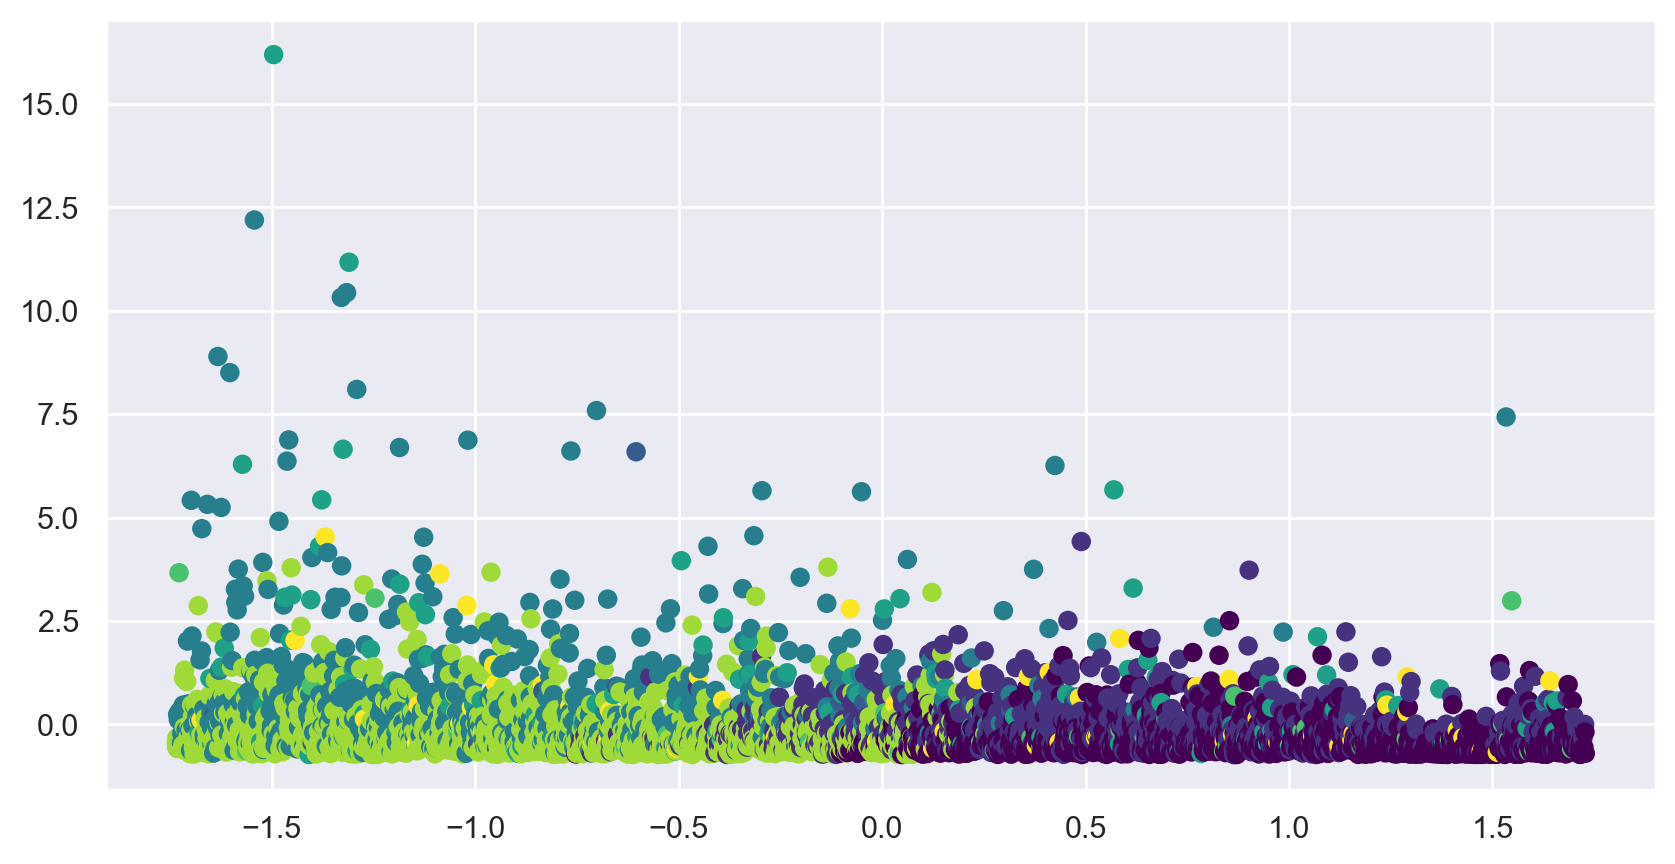

In [16]:
#visualize the clusters
plt.scatter(x[:,0],x[:,1],c=yp,cmap='viridis')

In [17]:
km.inertia_

19330.11746458042

### Elbow graph

In [18]:
wcss=[]

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)



In [19]:
wcss

[47987.99999999998,
 39018.76857091044,
 34529.24500866116,
 30616.582856222474,
 26898.04115161684,
 23491.109453925175,
 21884.24070047154,
 19350.655548894723,
 18014.64554447709]

Text(0.5, 1.0, 'Elbow Graph')

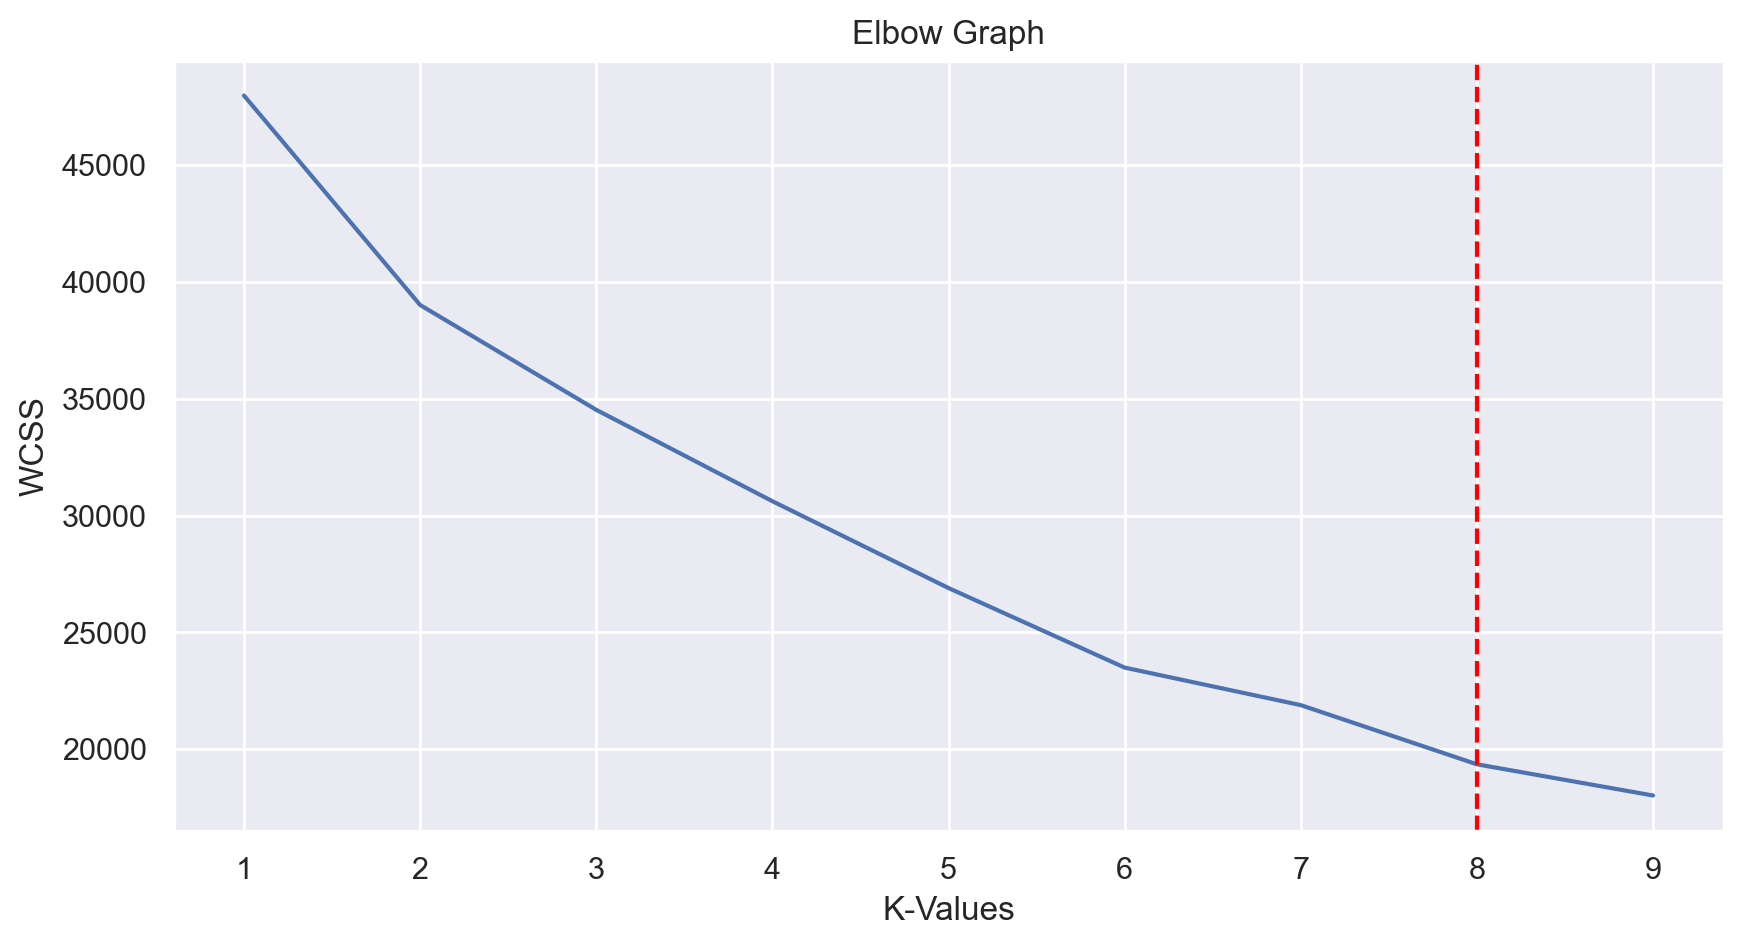

In [20]:
plt.plot(range(1,10),wcss)
plt.axvline(x = 8, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

### Hierarchical clustering

In [ ]:
#Dendrogram with single and complete linkage

In [21]:
from scipy.cluster import hierarchy

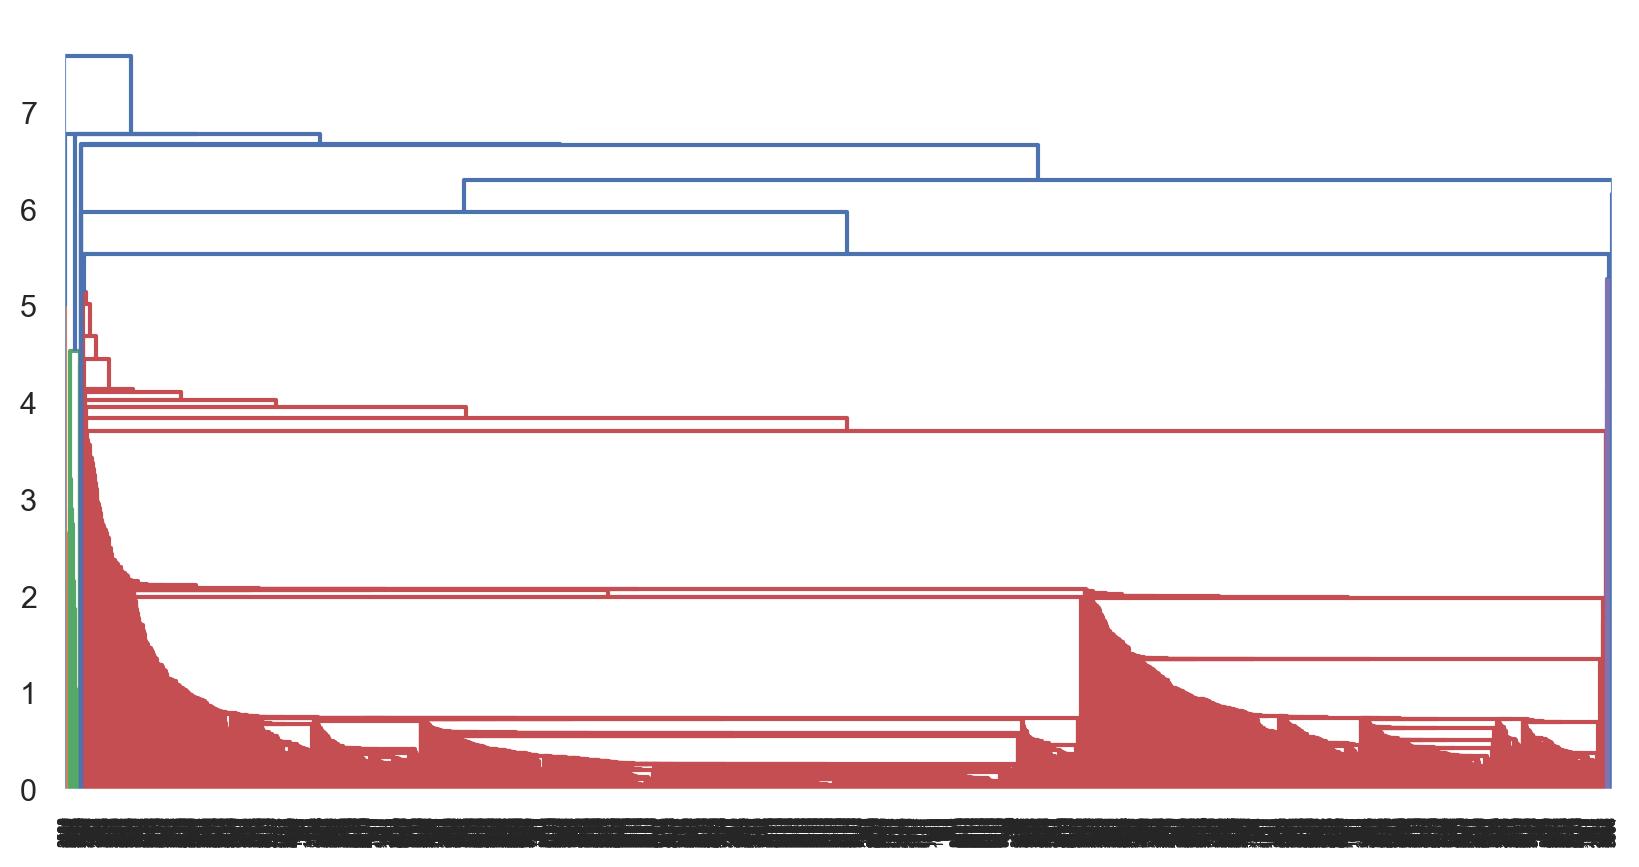

In [22]:
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)

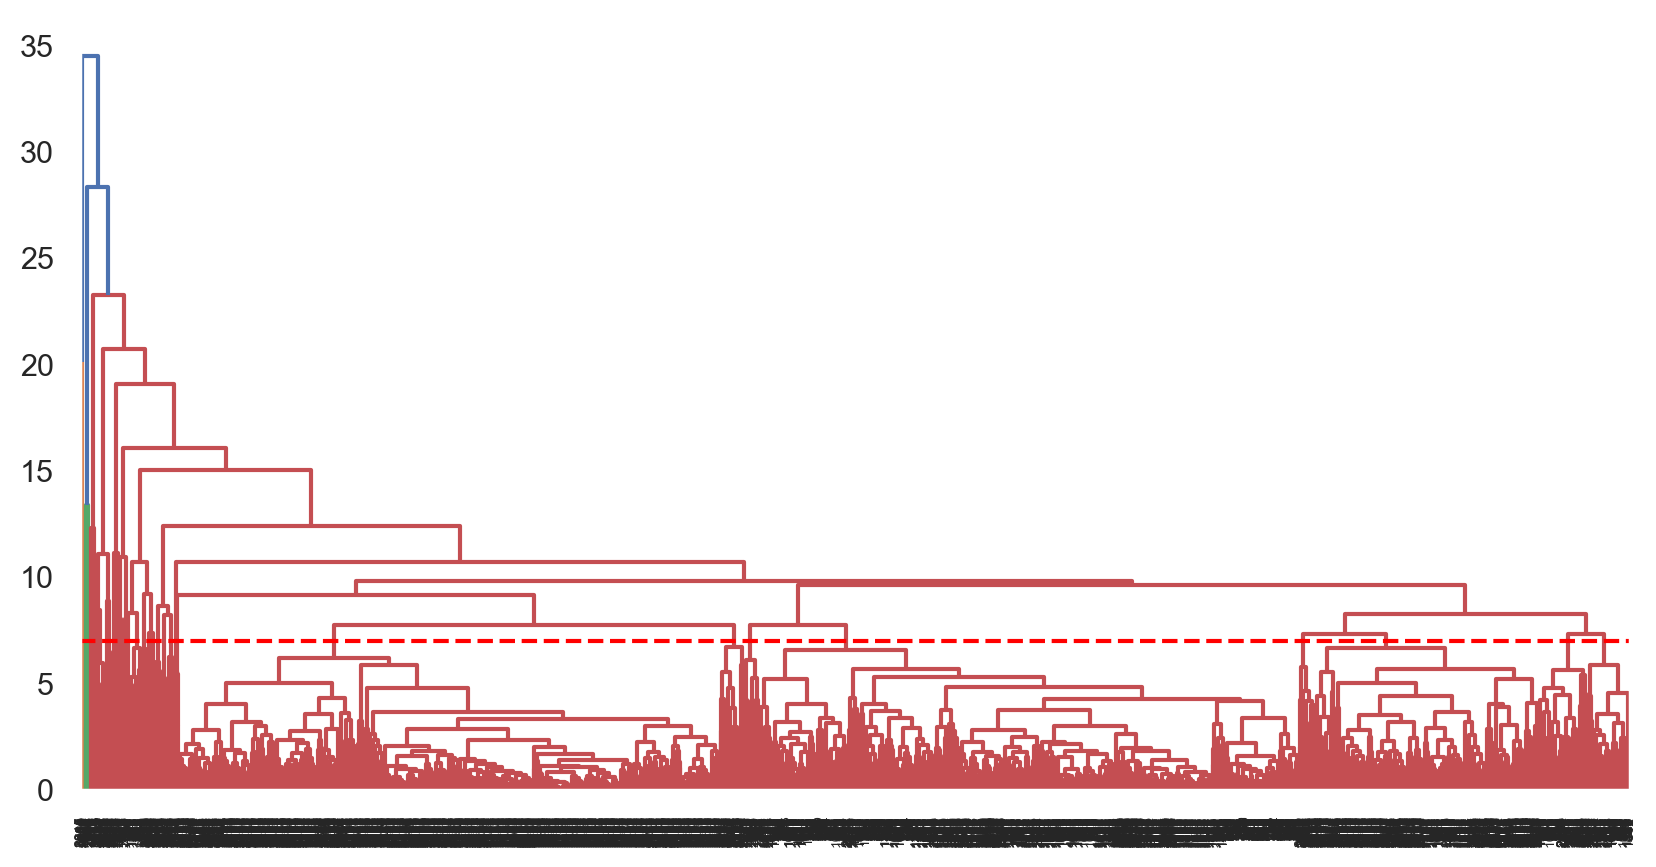

In [23]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
hc=AgglomerativeClustering(n_clusters=5)

ypred=hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
data['cluster']=ypred
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
#Analyzing the clusters

In [27]:
data[data['cluster']==0].mean()

ID#                    1695.324337
Balance              101276.799518
Qual_miles              251.093494
cc1_miles                 2.813012
cc2_miles                 1.000000
cc3_miles                 1.000000
Bonus_miles           27421.138313
Bonus_trans              15.320482
Flight_miles_12mo       524.836627
Flight_trans_12           1.575422
Days_since_enroll      4703.515663
Award?                    0.674699
cluster                   0.000000
dtype: float64

In [28]:
data[data['cluster']==1].mean()

ID#                   2388.934444
Balance              38220.721111
Qual_miles               9.431667
cc1_miles                1.183889
cc2_miles                1.000000
cc3_miles                1.000000
Bonus_miles           3770.797222
Bonus_trans              6.238333
Flight_miles_12mo      113.728333
Flight_trans_12          0.383889
Days_since_enroll     3429.802778
Award?                   0.000000
cluster                  1.000000
dtype: float64

In [29]:
data.groupby('cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,1695.324337,101276.799518,251.093494,2.813012,1.000000,1.000000,27421.138313,15.320482,524.836627,1.575422,4703.515663,0.674699
1,2388.934444,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000
2,1752.952381,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


<AxesSubplot:xlabel='ID#', ylabel='Balance'>

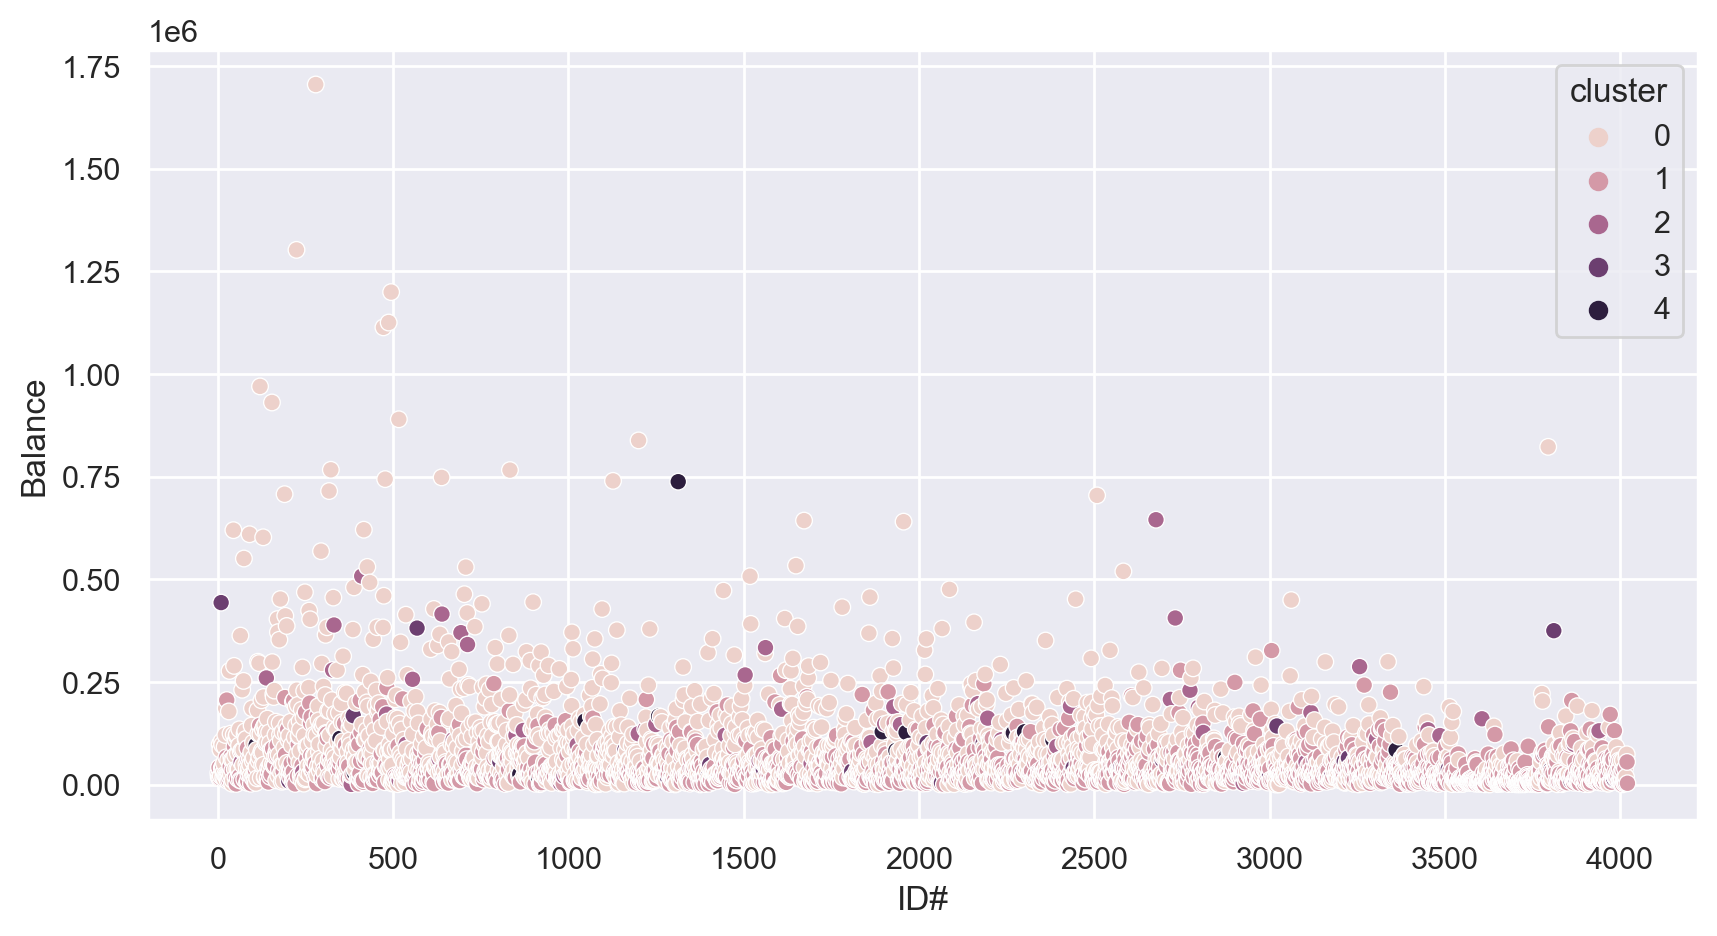

In [30]:
sns.scatterplot(x=data['ID#'],y=data['Balance'],hue=data['cluster'])

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(x,ypred)

0.21818887194803396

## Conclusion

In [ ]:
From the silhouette score we can conclude that clusters are overlapping.

# Q2. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [34]:
df=pd.read_csv('D:\ExcelR\Data science\Assignments\Clustering Assignment7\crime_data.csv')
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
df.drop(columns='City',inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [36]:
sc=StandardScaler()

x=sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [37]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [38]:
pd.DataFrame(x,columns= df.columns)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## Hierarchical clustering

In [ ]:
#Dendrogram with single and complete linkage

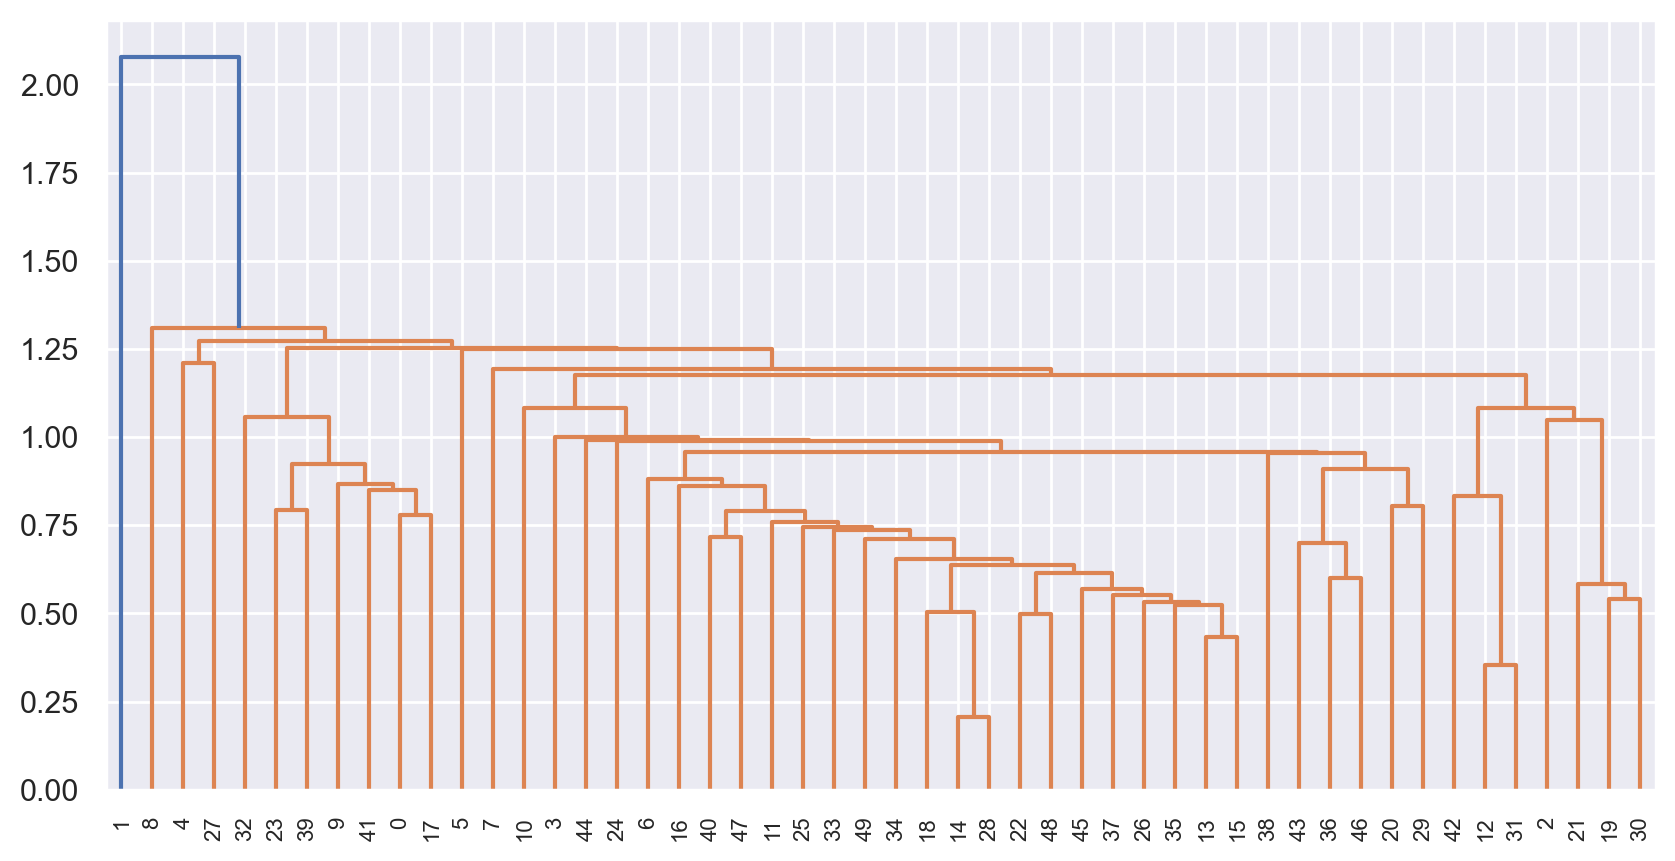

In [39]:
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)

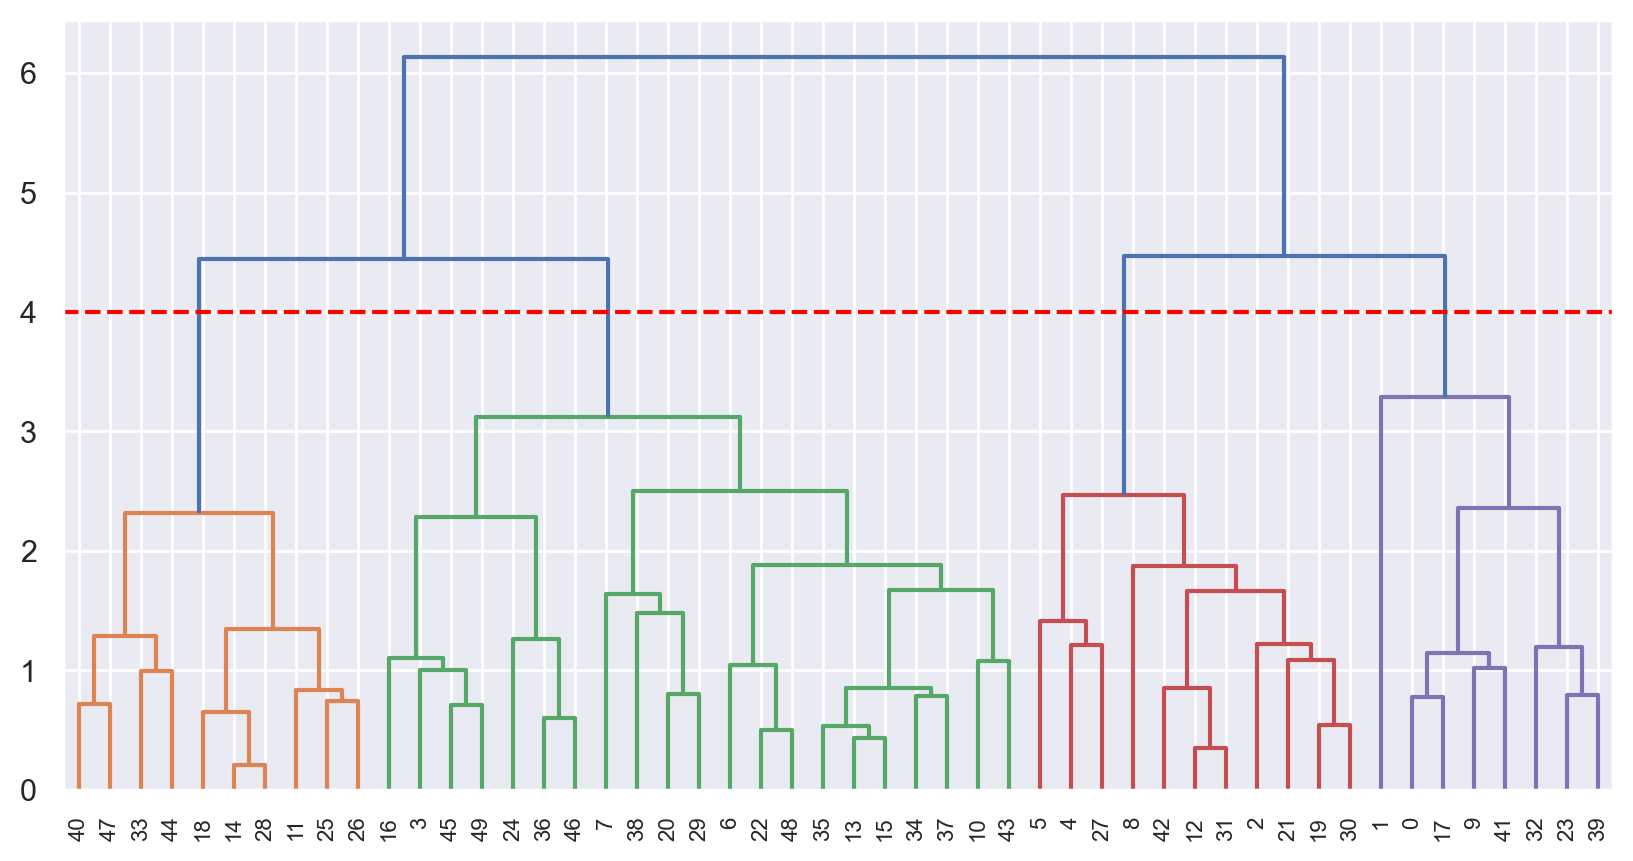

In [42]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=4,linestyle='--',color='red')

## Model building

In [43]:
hc=AgglomerativeClustering(n_clusters=4)

ypred=hc.fit_predict(x)
ypred

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [44]:
df['cluster']=ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [ ]:
#Analyzing the clusters

In [45]:
df[df['cluster']==0].mean()

Murder        6.210526
Assault     142.052632
UrbanPop     71.263158
Rape         19.184211
cluster       0.000000
dtype: float64

In [46]:
df[df['cluster']==1].mean()

Murder       10.966667
Assault     264.000000
UrbanPop     76.500000
Rape         33.608333
cluster       1.000000
dtype: float64

In [47]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


<AxesSubplot:xlabel='Assault', ylabel='UrbanPop'>

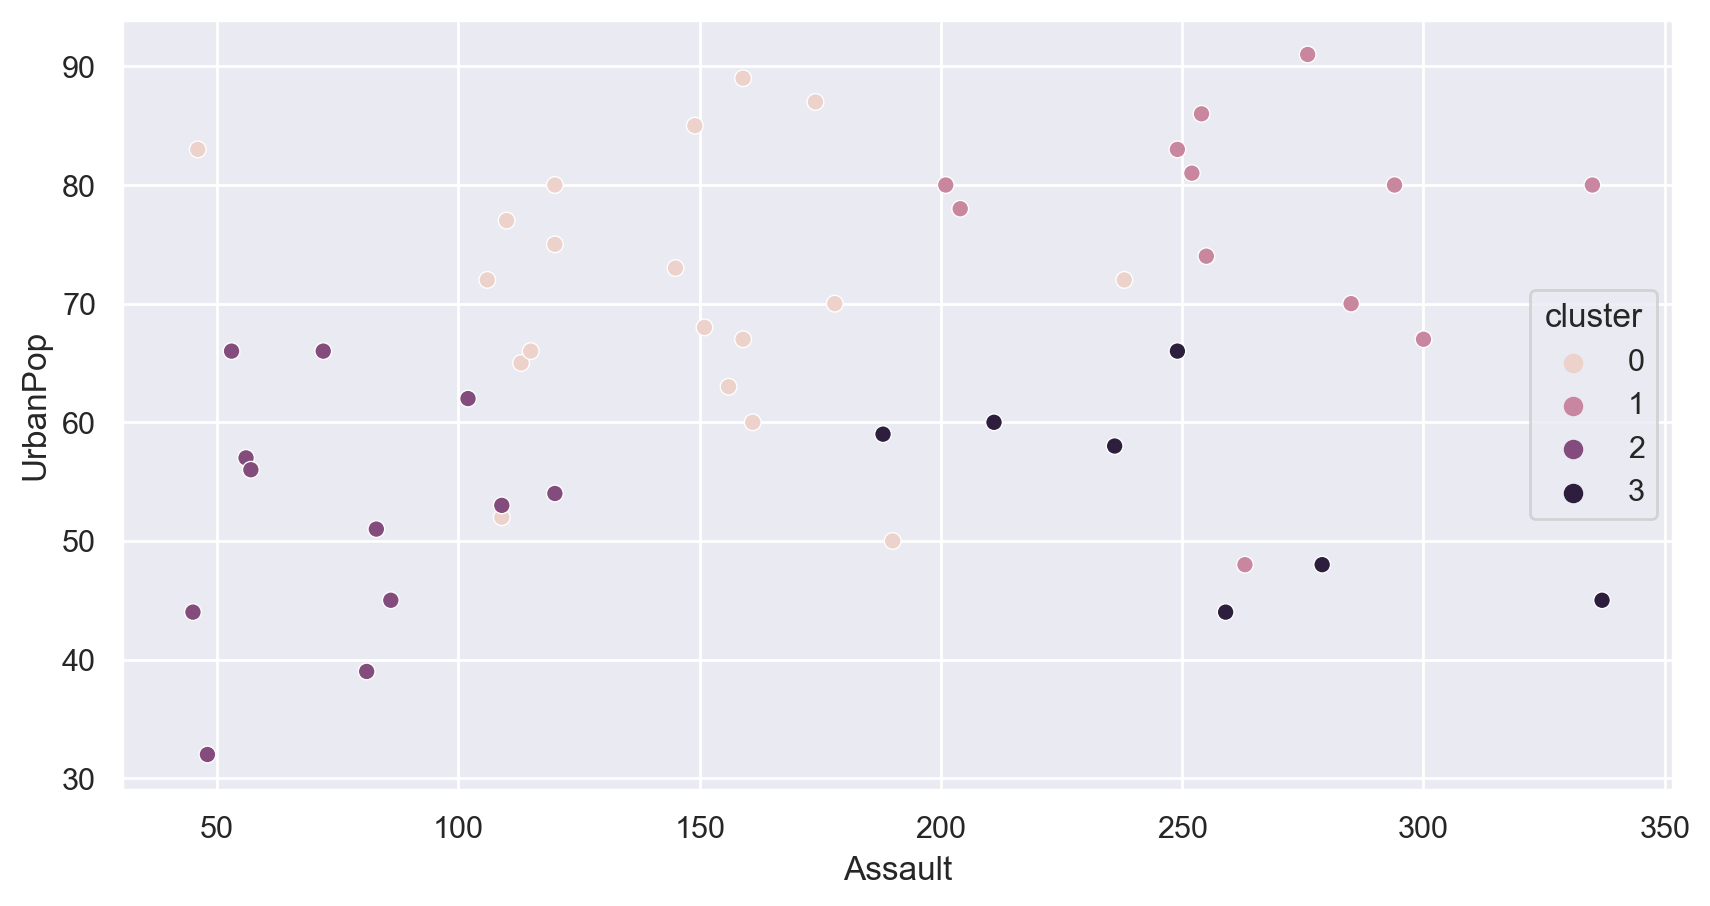

In [48]:
sns.scatterplot(x=df['Assault'],y=df['UrbanPop'],hue=df['cluster'])

### K Means

In [49]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 7, 3, 0, 3, 3, 4, 1, 3, 2, 4, 5, 6, 4, 5, 4, 0, 2, 5, 3, 1, 3,
       4, 2, 6, 0, 4, 3, 5, 1, 3, 6, 2, 5, 4, 4, 4, 4, 1, 2, 5, 2, 6, 4,
       5, 0, 4, 5, 4, 0])

In [50]:
#cluster centre
km.cluster_centers_

array([[ 0.03989114, -0.31224214, -0.69368431, -0.38092166],
       [-0.58282807,  0.1119999 ,  1.2359305 , -0.69368294],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.7275494 ,  1.26502915,  0.84337776,  1.52800061],
       [-0.66980002, -0.75326738,  0.36493313, -0.23905912],
       [-1.18293457, -1.19708982, -1.27640705, -1.16552107],
       [ 0.69855875,  0.60290854,  0.99167546,  0.50883024],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [ ]:
#visualize the clusters

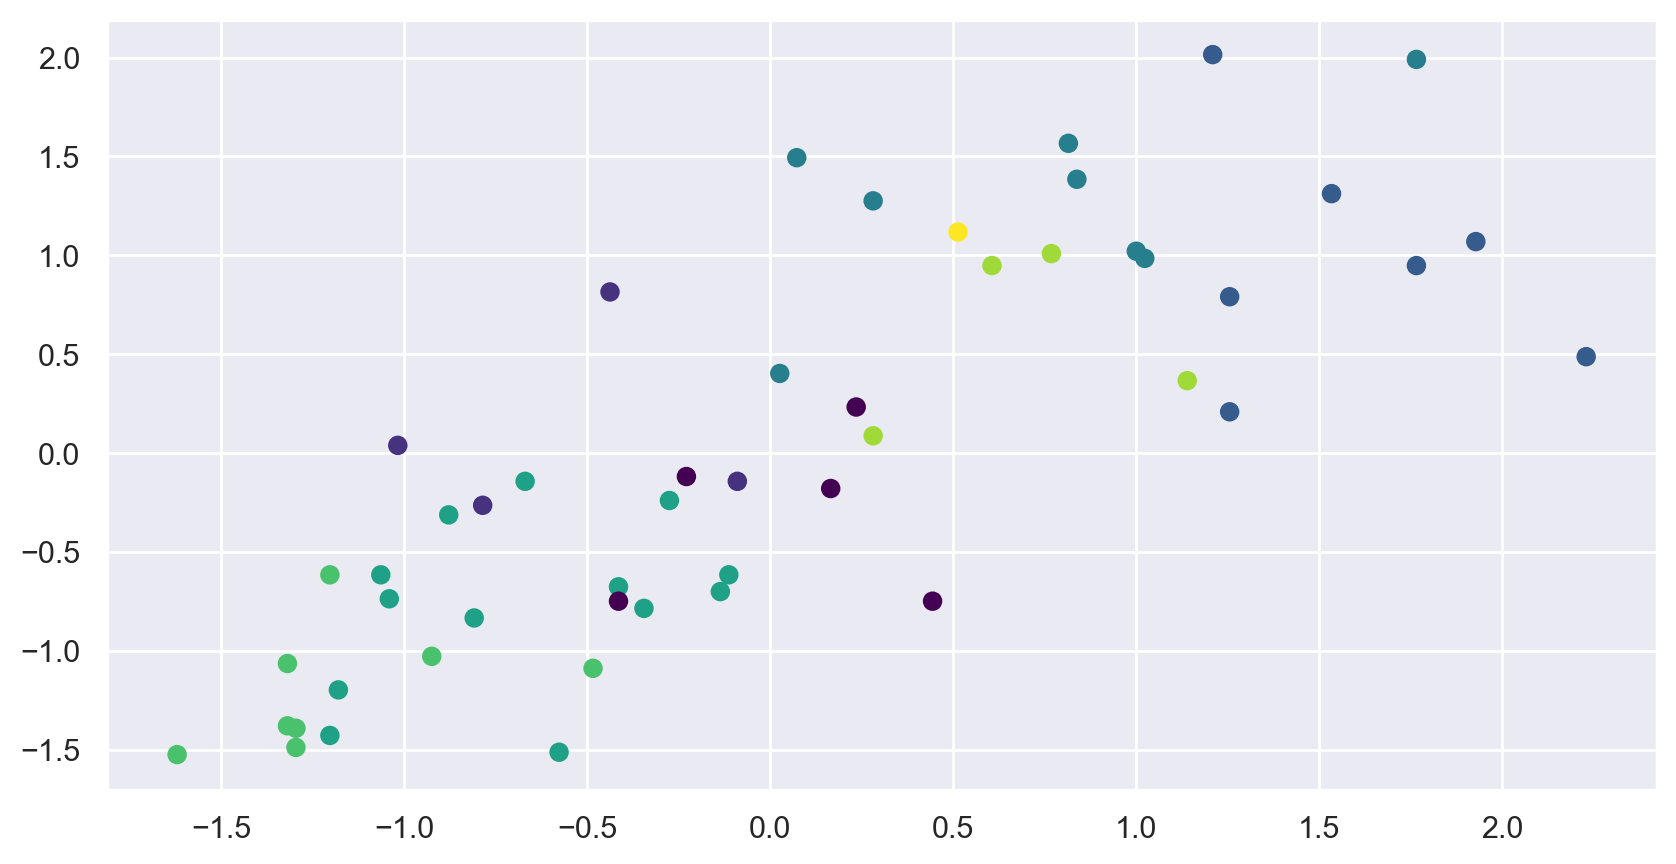

In [51]:
plt.scatter(x[:,0],x[:,1],c = yp, cmap='viridis')

In [52]:
km.inertia_

36.75262147925452

### Elbow graph

In [53]:
wcss=[]

for i in range(1,9):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [54]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.071170568930896,
 43.97909328688193,
 39.66640562730455,
 35.32959512891639]

Text(0.5, 1.0, 'Elbow Graph')

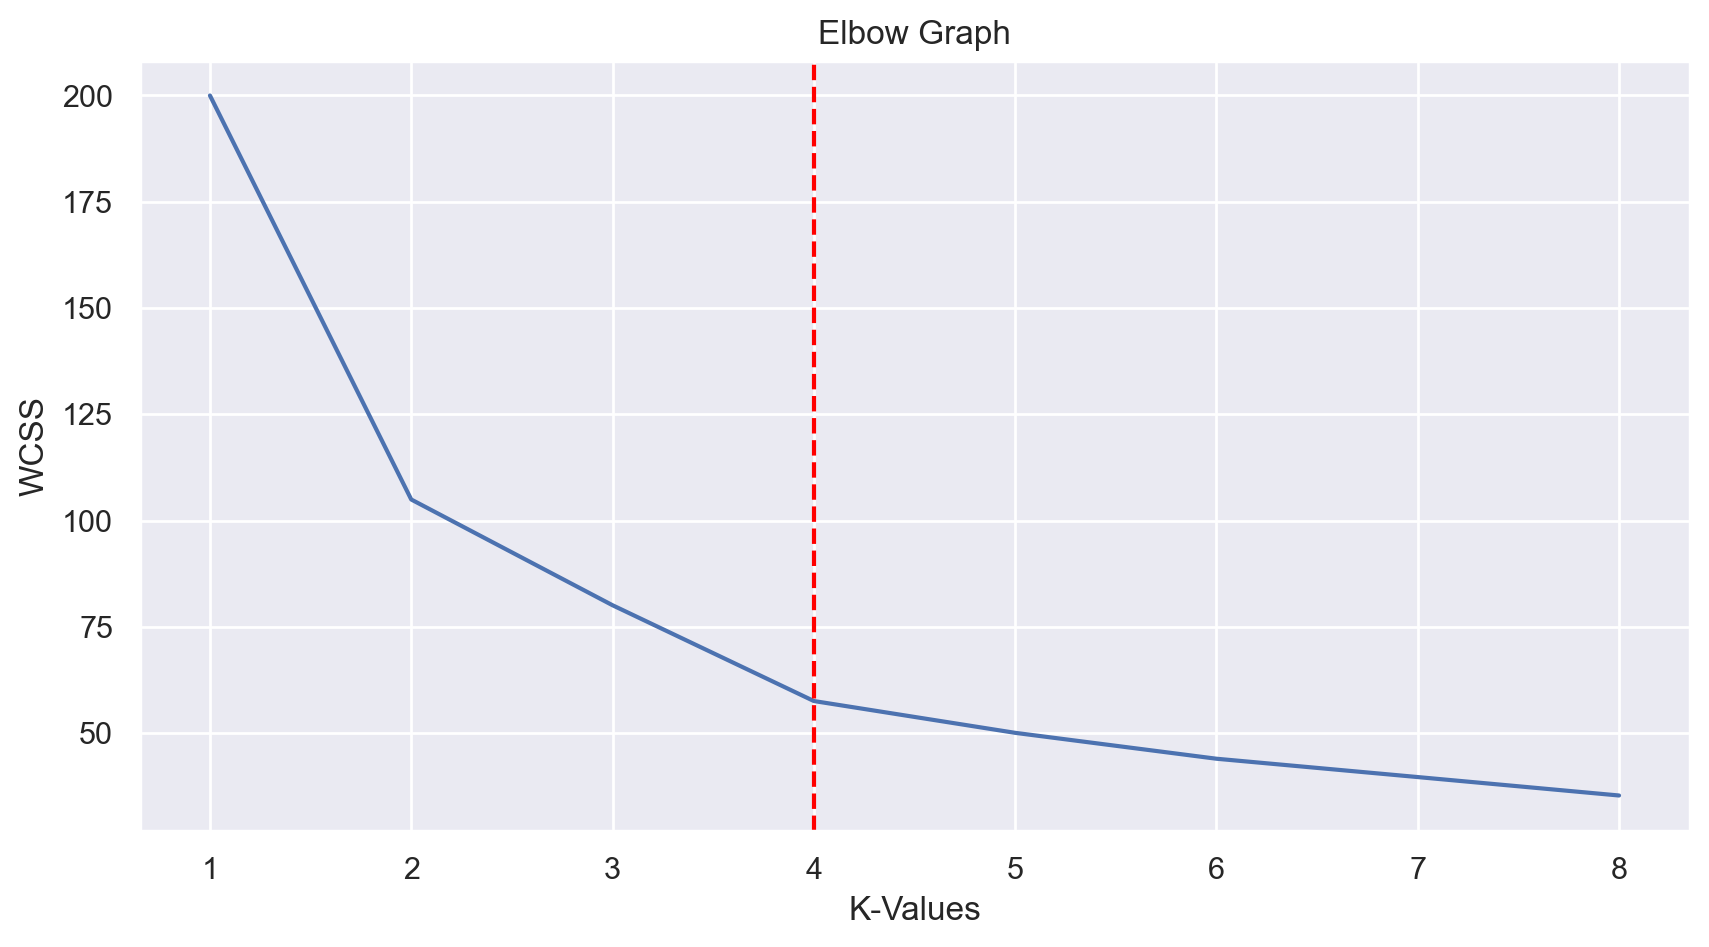

In [55]:
plt.plot(range(1,9),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
#Final model

In [56]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [57]:
#Visualize the clusters
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

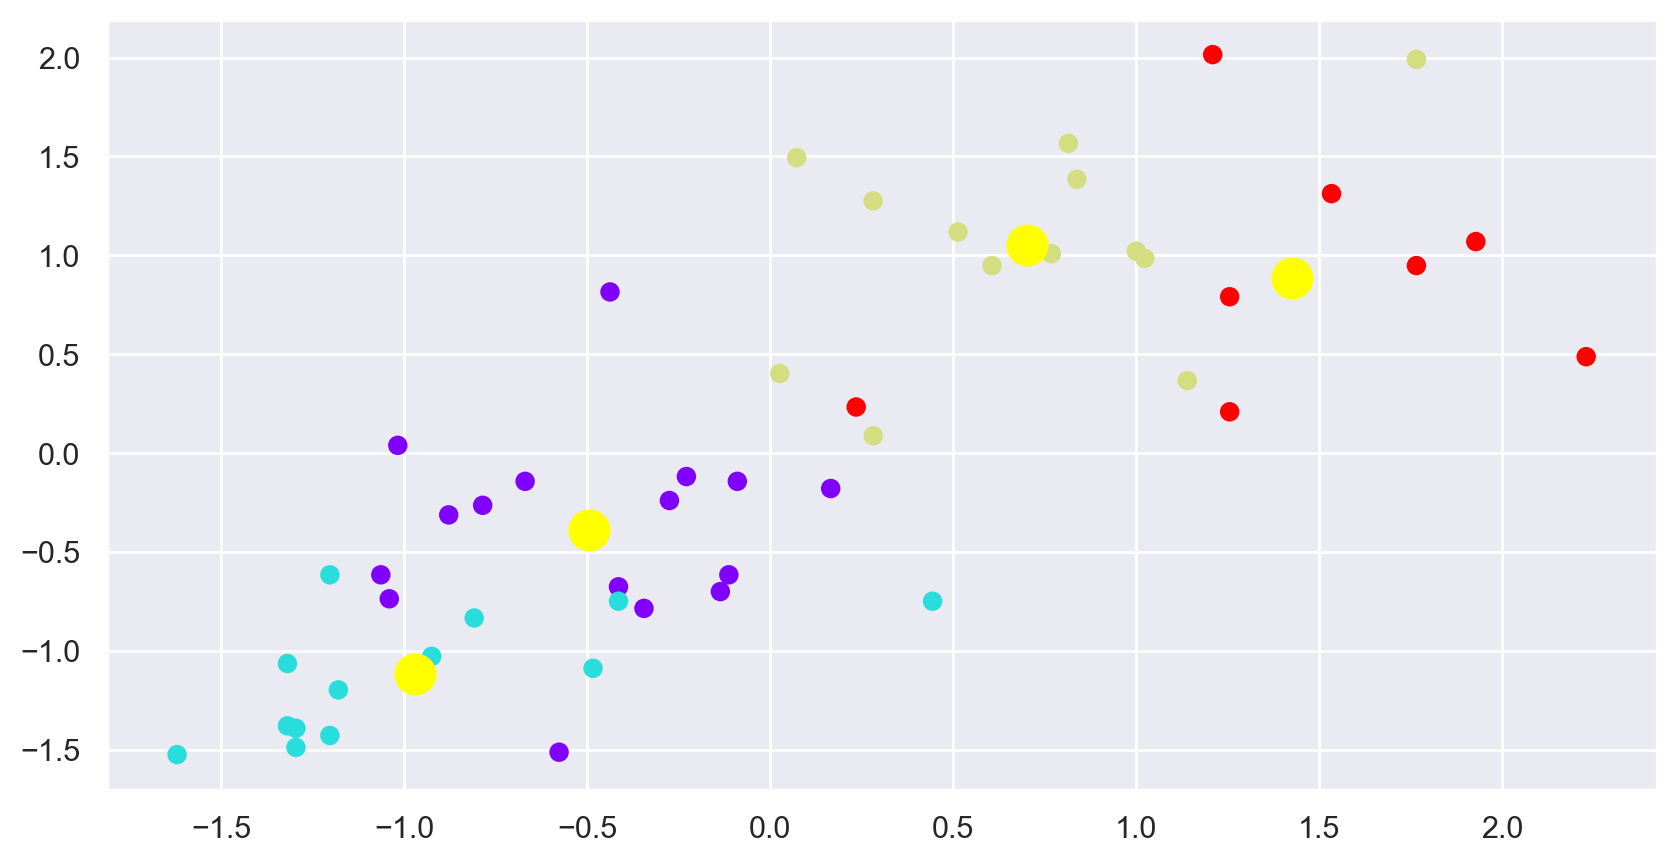

In [58]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

In [ ]:
#Silhouette score

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_score(x,ypred)

0.33968891433344395

###  Conclusion

In [ ]:
We can say that clusters are overlapping.